In [ ]:
# Loding the dataset
import pandas as pd
df = pd.read_csv('bankmarketing.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# checking for missing values
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
#cleaning data
df.duplicated().sum()

np.int64(12)

In [ ]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


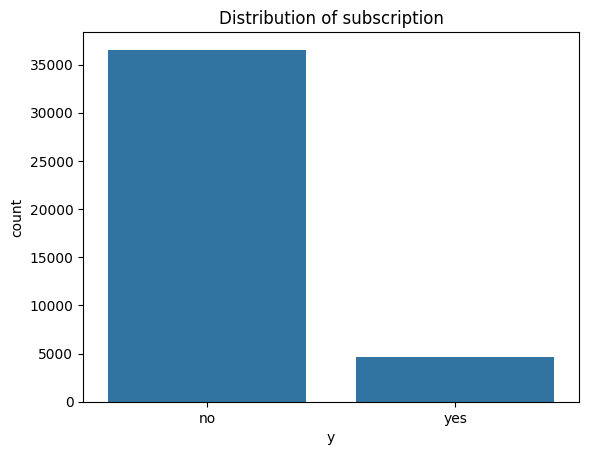

In [ ]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='y', data=df)
plt.title('Distribution of subscription')
plt.show()

In [ ]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
# Define features and target
X = df.drop('y', axis=1)
y = df['y']

# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
clf.fit(X_train, y_train)

# Predict & Evaluate
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9099077221952404
Confusion Matrix:
 [[6964  301]
 [ 441  530]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7265
           1       0.64      0.55      0.59       971

    accuracy                           0.91      8236
   macro avg       0.79      0.75      0.77      8236
weighted avg       0.90      0.91      0.91      8236



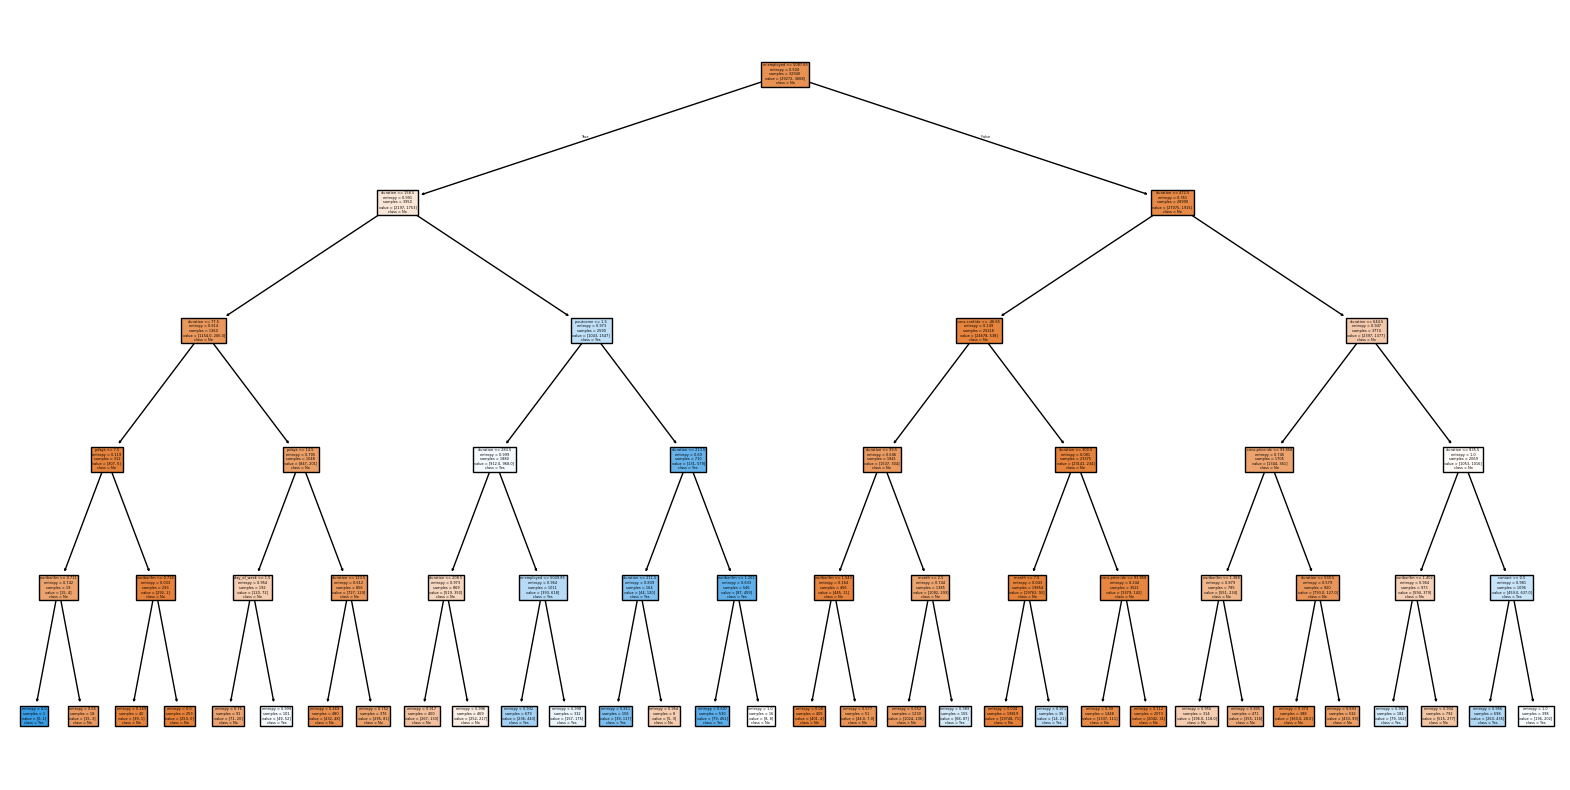

In [ ]:
# Visualize Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()